# TeleMarketing prediction using Machine learning


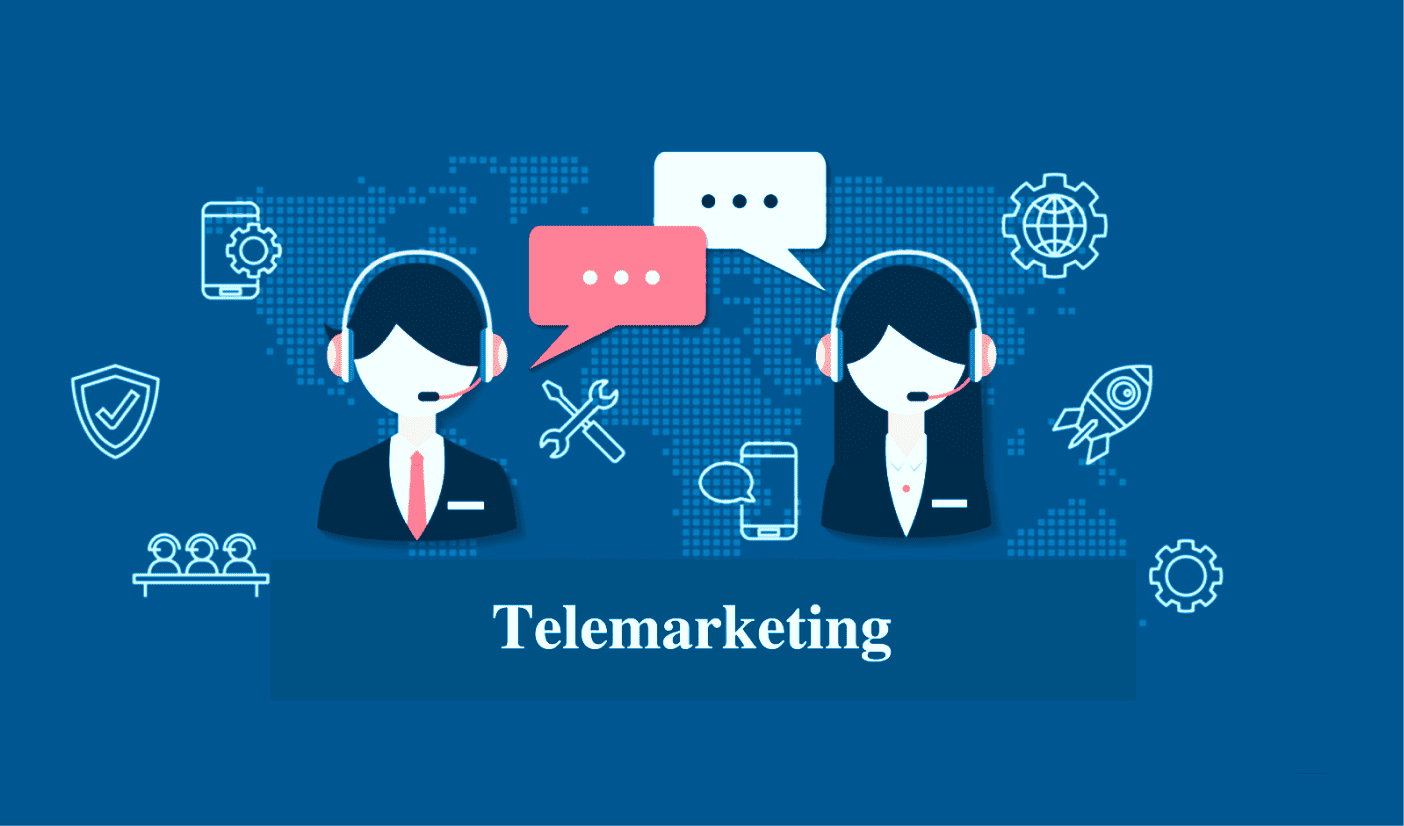

In [1]:
# Import Data Manimpulation Library
import numpy as np
import pandas as pd
# Import Data Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns
# Import FilterWarning Library
import warnings
warnings.filterwarnings('ignore')
# Import Sci-Kit Learn Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# **Data Uploading**

In [4]:
url = 'https://raw.githubusercontent.com/chandanc5525/MachineLearning-Bootcamp/refs/heads/main/bank-additional-full.csv'

df = pd.read_csv(url,sep = ';')   # Important Step
df.sample(frac = 1)   # Shuffle Dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
23326,57,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,wed,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
39985,27,admin.,single,high.school,no,no,no,cellular,jun,tue,...,2,999,0,nonexistent,-1.7,94.055,-39.8,0.761,4991.6,yes
41132,41,unemployed,married,basic.9y,no,no,no,cellular,nov,thu,...,2,3,2,success,-1.1,94.767,-50.8,1.041,4963.6,yes
22774,50,blue-collar,married,basic.4y,no,no,no,cellular,aug,mon,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
12817,33,services,married,high.school,no,yes,yes,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39736,31,technician,divorced,university.degree,no,no,no,cellular,may,wed,...,3,7,3,success,-1.8,93.876,-40.0,0.697,5008.7,yes
7764,42,technician,married,professional.course,unknown,no,no,telephone,jun,mon,...,9,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
40017,38,admin.,married,high.school,no,no,no,cellular,jul,thu,...,2,10,2,success,-1.7,94.215,-40.3,0.782,4991.6,yes
32915,43,admin.,divorced,basic.9y,no,yes,no,cellular,may,mon,...,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,no


# **Data Attributes**

## **Bank Client Data:**

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y',' basic.6y',' basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown') -- related with the last contact of the current campaign

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

## **Other attributes:**

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

## **Social and economic context attributes:**

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

## **Output variable (desired target):**

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
# Chekcing Information about Dataset
df.info()

In [ ]:
# By Visualization Checking if any null value present or not
plt.figure(figsize = (10,5))
sns.heatmap(df.isnull(),cmap='coolwarm',center = 0,yticklabels=False)
plt.show()

In [ ]:
# Checking Dataset:
df.sample(5)

In [ ]:
# Divide Dataset into Categorical and Numerical:

numerical_data = df.select_dtypes(exclude = 'object')
categorical_data = df.select_dtypes(include = 'object')

In [ ]:
categorical_data.sample(5)

In [ ]:
numerical_data.sample(5)

In [ ]:
plt.figure(figsize = (10,15))
plt.tight_layout()
plot = 0

for i in numerical_data.columns:
  plot = plot + 1
  plt.subplot(5,2,plot)
  sns.boxenplot(df[i])
plt.show()

In [ ]:
for i in categorical_data.columns:
    print(categorical_data[i].value_counts())
    print('*'*20)

In [ ]:
df['y'].replace({'yes':1,'no':0},inplace = True)

In [ ]:
categorical_data.columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
df['job'] = LabelEncoder().fit_transform(df['job'])
df['marital'] = LabelEncoder().fit_transform(df['marital'])
df['education'] = LabelEncoder().fit_transform(df['education'])
df['default'] = LabelEncoder().fit_transform(df['default'])
df['housing'] = LabelEncoder().fit_transform(df['housing'])
df['loan'] = LabelEncoder().fit_transform(df['loan'])
df['contact'] = LabelEncoder().fit_transform(df['contact'])
df['month'] = LabelEncoder().fit_transform(df['month'])
df['day_of_week'] = LabelEncoder().fit_transform(df['day_of_week'])
df['poutcome'] = LabelEncoder().fit_transform(df['poutcome'])

In [ ]:
df.sample(5)

In [ ]:
df['y'].value_counts().plot(kind = 'bar')

In [ ]:
# Split the Dataset into Train and Test
X = df.drop(columns = ['y'], axis = 1)
y = df['y']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,
                                                 random_state = 42)

In [ ]:
# Use Scaling Technique
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.max(),X_train.min()

In [ ]:
# Use Balance Dataset Technique
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_train,y_train = smote.fit_resample(X_train,y_train)

# **Random Forest Prediction Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)

print(accuracy_score(y_test,y_pred_rf))

In [ ]:
X.shape

# **ANN Model Building**

In [ ]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
ann_model = Sequential()

ann_model.add(Dense(128,activation = 'relu',input_dim = 20))
ann_model.add(Dense(64,activation = 'relu'))
ann_model.add(Dense(32,activation = 'relu'))
ann_model.add(Dense(16,activation = 'relu'))
ann_model.add(Dense(1,activation = 'sigmoid'))

In [ ]:
ann_model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
ann_model.fit(X_train,y_train,epochs = 100,batch_size = 32,
              validation_split = 0.3)

In [ ]:
model_history = ann_model.history.history

plt.figure(figsize = (10,5))
plt.plot(model_history['accuracy'])
plt.plot(model_history['loss'])
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Loss'],loc = 'upper left')
plt.show()

In [ ]:
y_pred_ann = ann_model.predict(X_test)
y_pred_ann = np.where(y_pred_ann > 0.5,1,0)
print('Accuracy Score :',accuracy_score(y_test,y_pred_ann))

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr,tpr,thresholds = roc_curve(y_test,y_pred_ann)
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()